# Traffic Sign Recognition using LeNet Architecture

## Problem Definition
> Identifying the type of traffic sign using the provided images

## Data
The original data came from the [German Traffic Sign Recognition Benchmark (GTSRB)](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Test.csv). In this case, the image set (train, validation and test) has been transformed into pickle files

## Features
Images (Unstructured Data)
- 43 Types of Traffic Signs (43 Classes):
    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')
    
  
- 34,000+ images in the training set (with labels)
- 12,000+ images in the testing set (without labels)


# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Constants

In [7]:
TRAIN_FILE = './traffic-signs-data/train.p'
TEST_FILE = './traffic-signs-data/test.p'
VALID_FILE = './traffic-signs-data/valid.p'

# Load Data

In [8]:
with open(TRAIN_FILE, mode='rb') as training_data:
    train = pickle.load(training_data)
with open(TEST_FILE, mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open(VALID_FILE, mode='rb') as valdation_data:
    validation = pickle.load(valdation_data)

## Explore Data

4

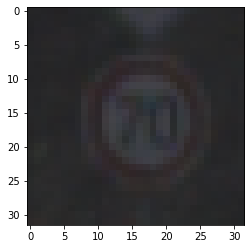

In [58]:
i = 7000
plt.imshow(train['features'][i])
train['labels'][i]

# Data Preprocessing

In [33]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

In [34]:
X_train.shape

(34799, 32, 32, 3)

In [35]:
X_validation.shape

(4410, 32, 32, 3)

In [36]:
# Shuffle the Data
X_train, y_train = shuffle(X_train, y_train)

In [37]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [38]:
X_train_gray.shape # Channels = 1

(34799, 32, 32, 1)

In [39]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [40]:
# X_train_gray_norm[0]

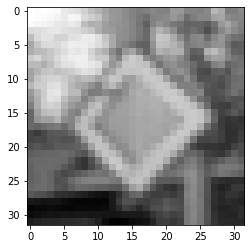

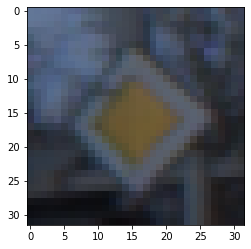

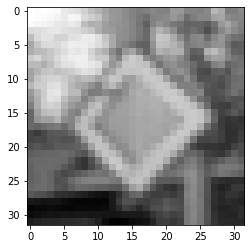

In [41]:
i = 599
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')

plt.figure()
plt.imshow(X_train[i])

plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

# Modelling

In [42]:
# Model
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

In [43]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [44]:
history = cnn_model.fit(X_train_gray_norm, 
              y_train, 
              batch_size=500, 
              epochs=20, 
              verbose=1, 
              validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/20
70/70 [==============================] - 12s 175ms/step - loss: 3.1910 - accuracy: 0.1728 - val_loss: 2.6839 - val_accuracy: 0.3104
Epoch 2/20
70/70 [==============================] - 12s 175ms/step - loss: 1.6669 - accuracy: 0.5339 - val_loss: 1.3569 - val_accuracy: 0.5785
Epoch 3/20
70/70 [==============================] - 12s 172ms/step - loss: 0.9368 - accuracy: 0.7287 - val_loss: 0.9955 - val_accuracy: 0.6968
Epoch 4/20
70/70 [==============================] - 13s 183ms/step - loss: 0.6860 - accuracy: 0.8051 - val_loss: 0.8201 - val_accuracy: 0.7533
Epoch 5/20
70/70 [==============================] - 15s 221ms/step - loss: 0.5381 - accuracy: 0.8508 - val_loss: 0.7394 - val_accuracy: 0.7748
Epoch 6/20
70/70 [==============================] - 13s 182ms/step - loss: 0.4498 - accuracy: 0.8780 - val_loss: 0.6805 - val_accuracy: 0.7984
Epoch 7/20
70/70 [==============================] - 14s 197ms/step - loss: 0.3828 - accuracy: 0.8995 - val_loss: 0.6416 - val_accuracy: 0.8161

## Evaluation

In [45]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 0.9095 - accuracy: 0.8495
Test Accuracy: 0.8494853377342224


In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

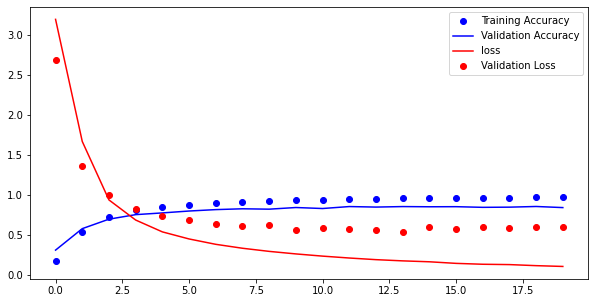

In [47]:
epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(10, 5))
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, history.history['loss'], 'r', label='loss')
plt.plot(epochs, history.history['val_loss'], 'ro', label='Validation Loss')
plt.legend();

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

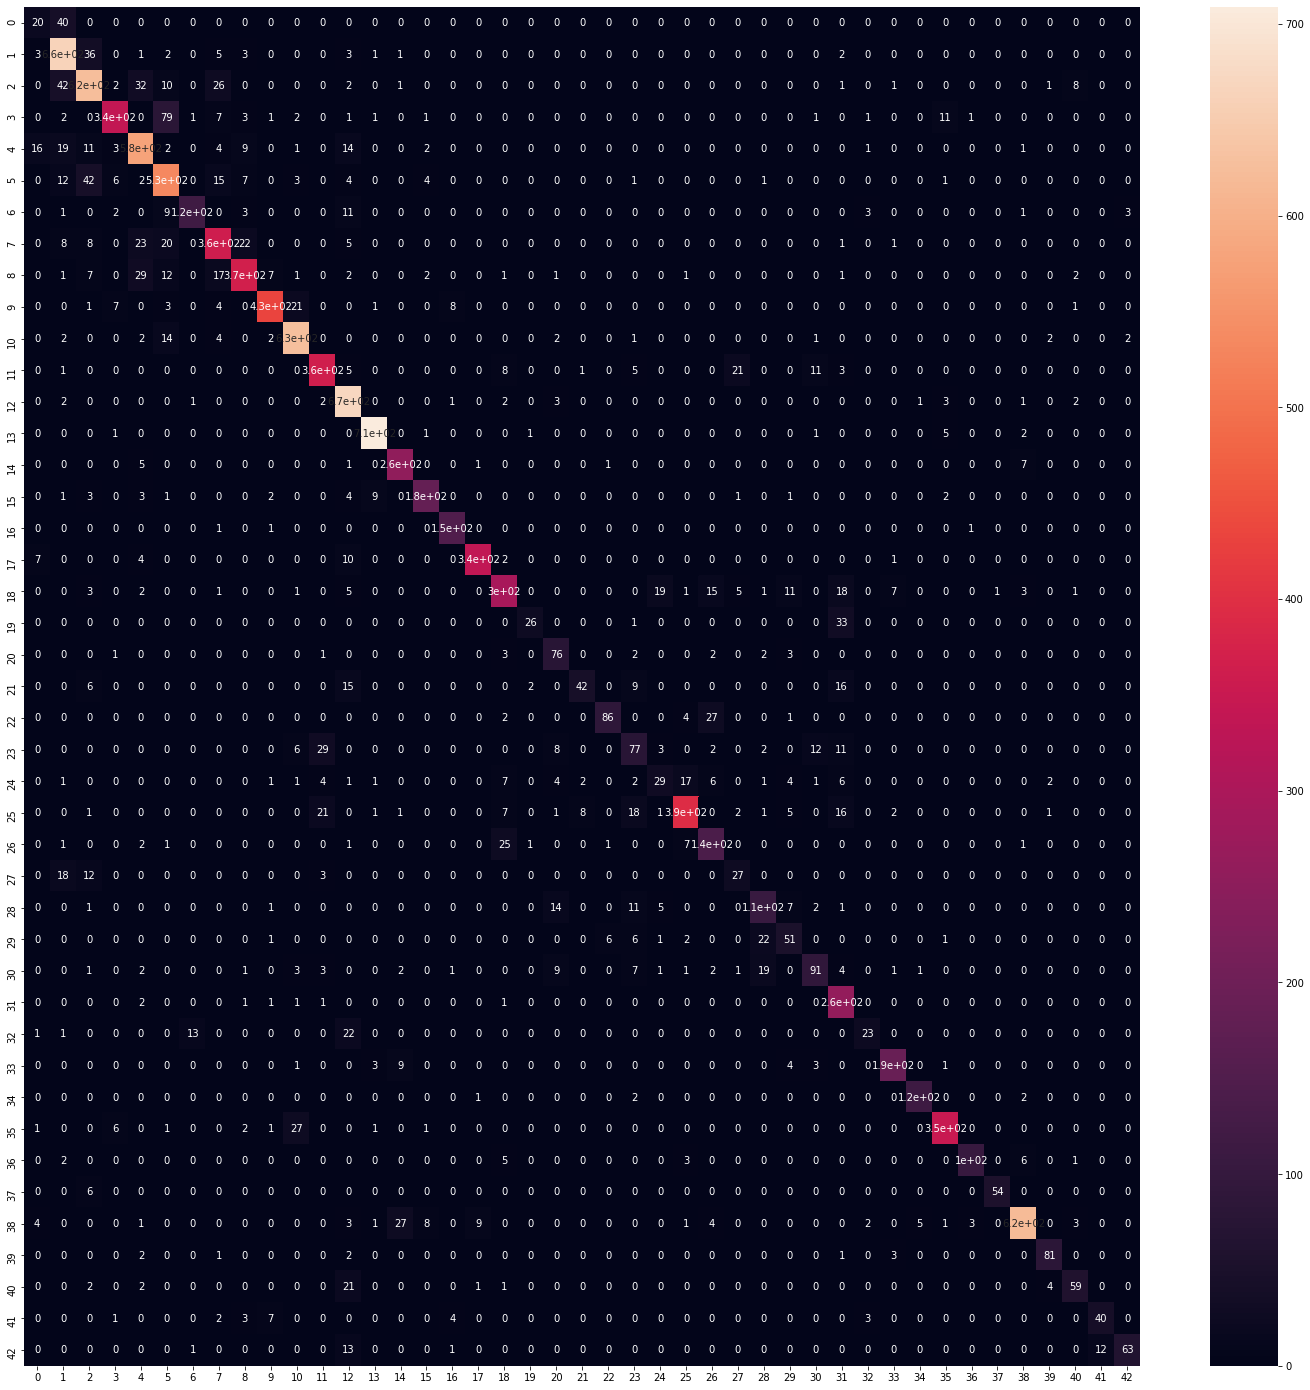

In [48]:
y_preds = cnn_model.predict_classes(X_test_gray_norm)
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

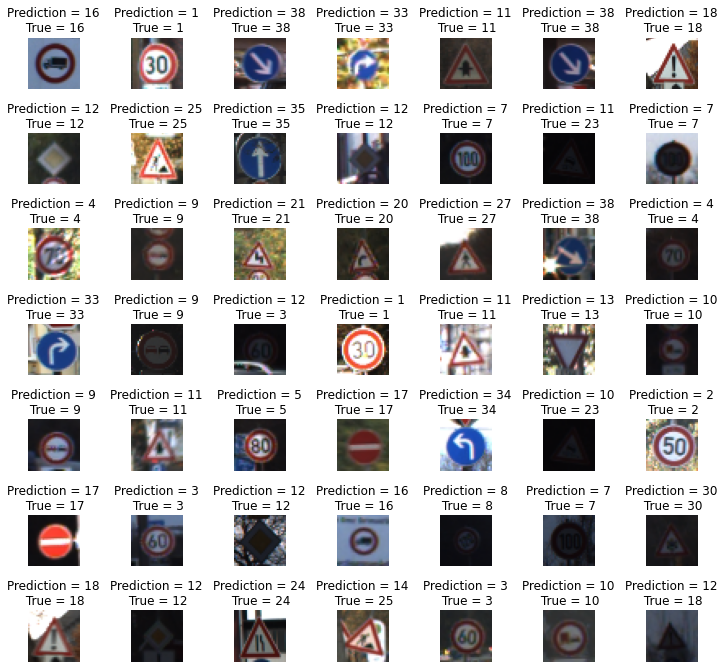

In [49]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_preds[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)